## Instrucciones para examen
**Objetivo**: evaluar la capacidad para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Se utiliza el «Diabetes Dataset» disponible en Kaggle. Se debe demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

## Contexto y Descripción del Dataset
El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

#### Diccionario de Datos:

* **Pregnancies**: Número de embarazos.
* **Glucose**: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
* **BloodPressure**: Presión arterial diastólica (mm Hg).
* **SkinThickness**: Espesor del pliegue cutáneo del tríceps (mm).
* **Insulin**: Niveles séricos de insulina a las 2 horas (mu U/ml).
* **BMI**: Índice de masa corporal (peso en kg / (altura en m)^2).
* **DiabetesPedigreeFunction**: Función de pedigrí de diabetes.
* **Age**: Edad (años).
* **Outcome**: Variable objetivo (1: diabetes, 0: no diabetes).

- **Number of Instances**: 768
- **Number of Attributes**: 8 plus class
- **For Each Attribute**: (all numeric-valued)
- **Missing Attribute Values**: Yes
- **Class Distribution**: (class value 1 is interpreted as "tested positive for
diabetes")

## Requisitos

### 1. Limpieza de Datos:
* **Identificación y eliminación de valores duplicados**: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* **Verificación y ajuste de tipos de datos**: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* **Corrección de inconsistencias en valores categóricos**: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* **Manejo de valores faltantes adecuadamente**: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [15]:
# Importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Leyendo y mostrando data
df=pd.read_csv('../../data/Machine_Learning/Diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Chequeo de valores nulos
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
# Chequeo de valores duplicados
df.duplicated().sum()

np.int64(0)

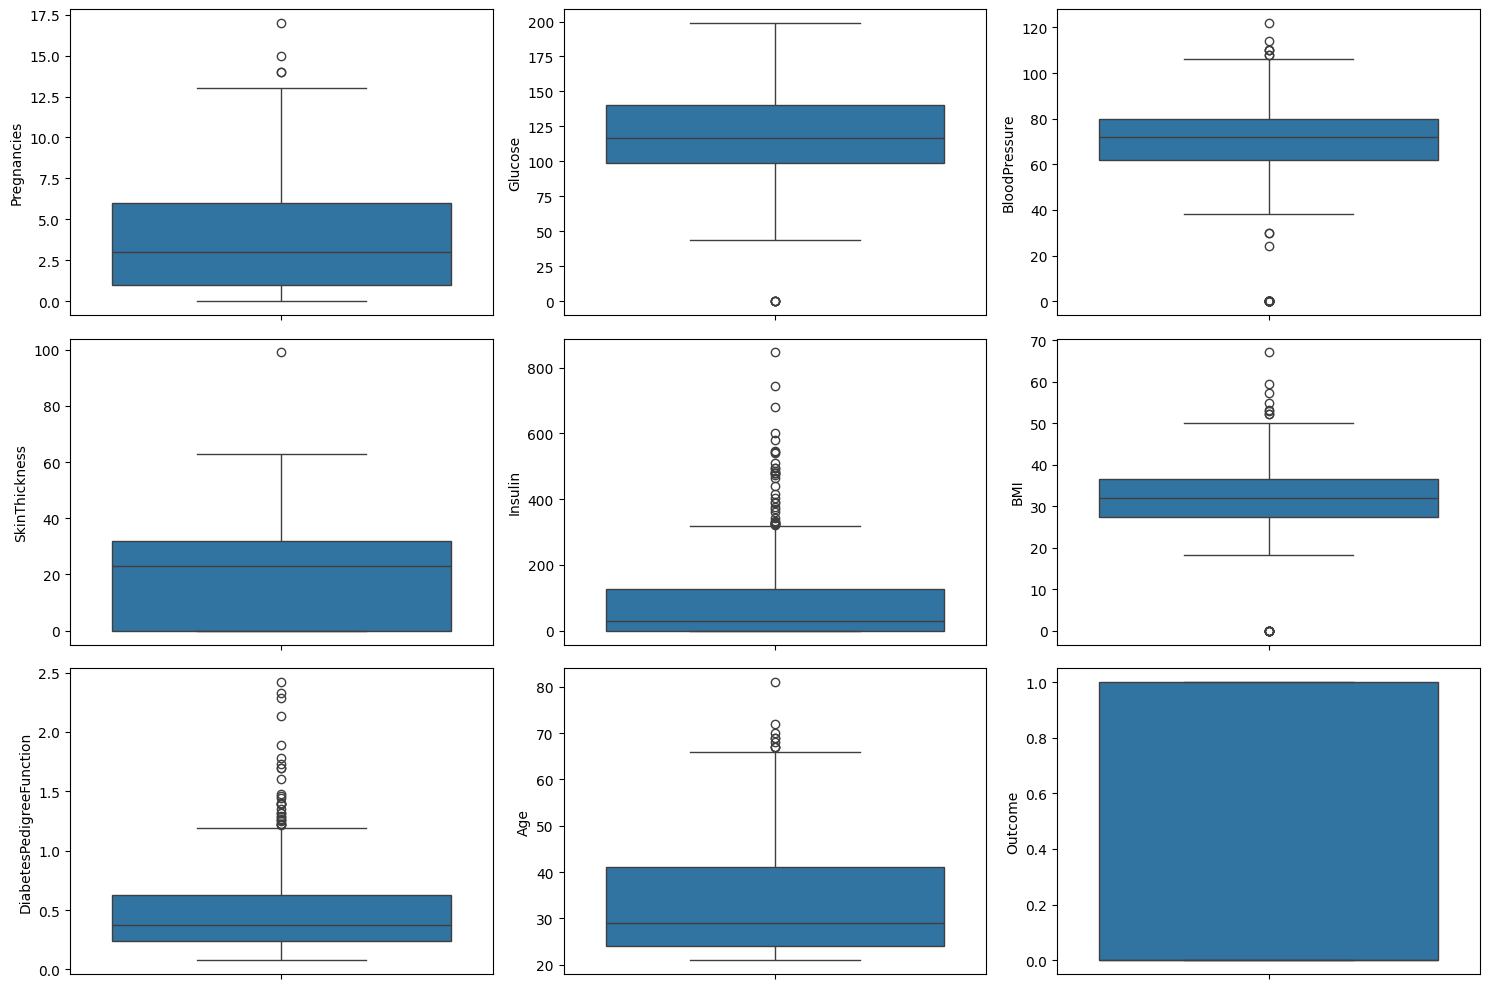

In [6]:
# Outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [7]:
# Removiendo outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.columns:
    df=remove_outliers(df,col)

### 2. Exploración de Datos:
* **Visualizaciones univariadas y multivariadas**: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* **Estadísticas descriptivas**: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [8]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

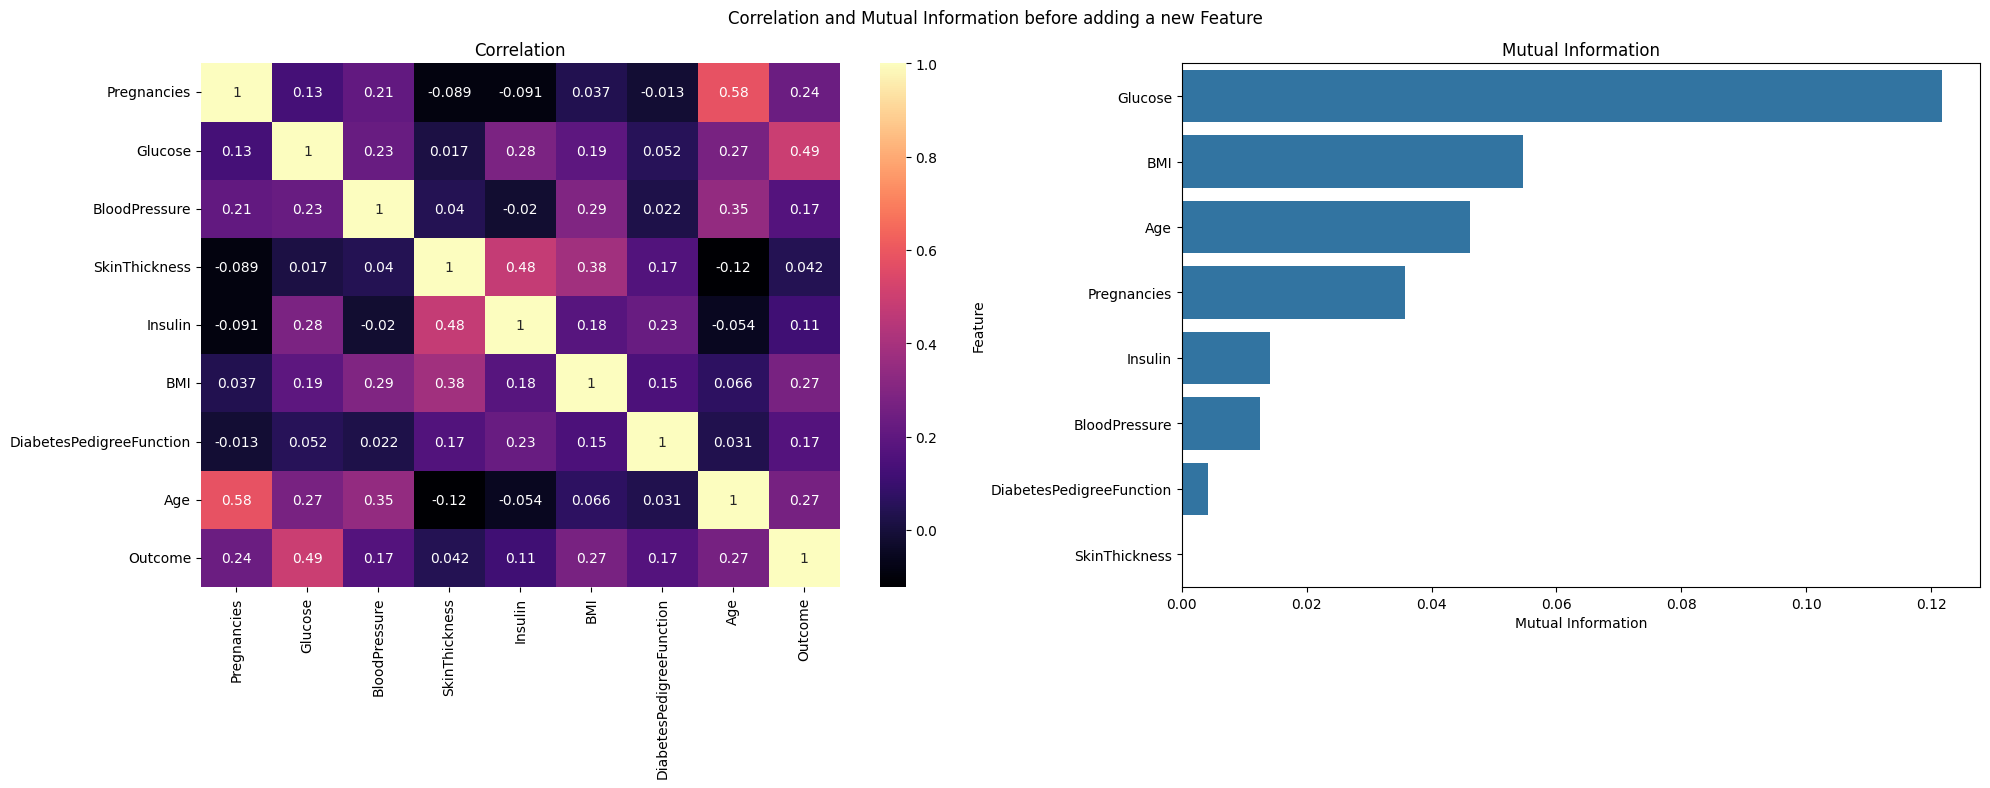

In [9]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

In [10]:
# let us create some new features- (Age Binning)

max=df['Age'].max()
min=df['Age'].min()
print(min,max)

21 65


In [11]:
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
 9   Age_Category              636 non-null    int64  
 10  Normalized_Age            636 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 59.6 KB


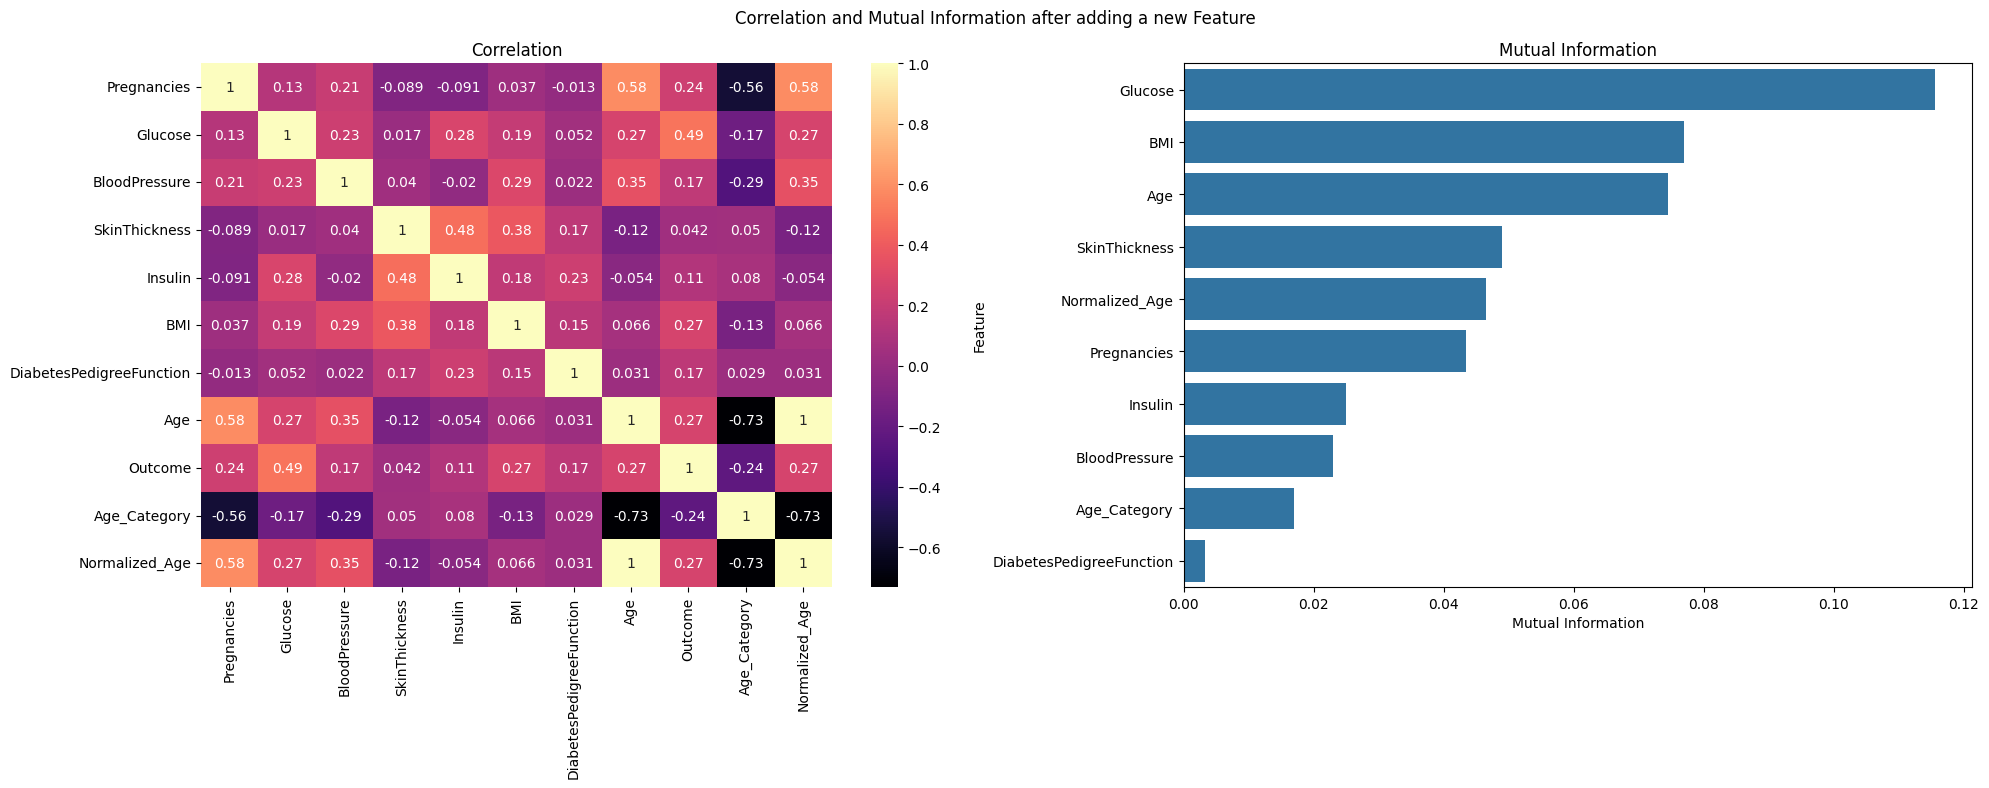

In [13]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

### 3.Implementación de Modelos:
* **Modelos de Clasificación**: Implementa modelos de Random Forest y XGBoost.
* **Evaluación de Modelos**: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* **Comparación de Rendimiento**: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

#### Preparacion de datos

In [16]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [17]:
# Splitting the dataset into training set (75%) and testing set (25%).
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20) 

#### Modelos

In [18]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

##### Logistic Regresion

In [19]:
reg=LogisticRegression(max_iter=10000)
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nreg.fit(x_t,y_t)
print(nreg.best_params_)
print(nreg.best_score_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': np.int64(8)}
0.7945035460992907


In [20]:
nreg=nreg.best_estimator_
predt1=nreg.predict(x_t)
pred1=nreg.predict(x_te)

In [21]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

##### K Nearest Neighbors

In [22]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

{'n_neighbors': np.int64(28)}
0.7796985815602836


In [23]:
nknn=nknn.best_estimator_
predt2=nknn.predict(x_t)
pred2=nknn.predict(x_te)

In [24]:
cr.append(classification_report(y_te,pred2))
cm_t.append(confusion_matrix(y_t,predt2))
cm.append(confusion_matrix(y_te,pred2))
acc_t.append(accuracy_score(y_t,predt2))
acc.append(accuracy_score(y_te,pred2))
p_t.append(precision_score(y_t,predt2))
p.append(precision_score(y_te,pred2))
r_t.append(recall_score(y_t,predt2))
r.append(recall_score(y_te,pred2))
f1_t.append(f1_score(y_t,predt2))
f1.append(f1_score(y_te,pred2))

##### Decision Tree

In [25]:
dt=DecisionTreeClassifier(class_weight ='balanced')
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',n_iter=5)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': np.float64(0.004201696620044382)}
0.7460992907801418


In [26]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)

{'min_samples_split': np.int64(38), 'min_samples_leaf': np.int64(42), 'criterion': 'gini'}
0.7879432624113474


In [27]:
ndt=ndt.best_estimator_
predt3=ndt.predict(x_t)
pred3=ndt.predict(x_te)

In [28]:
cr.append(classification_report(y_te,pred3))
cm_t.append(confusion_matrix(y_t,predt3))
cm.append(confusion_matrix(y_te,pred3))
acc_t.append(accuracy_score(y_t,predt3))
acc.append(accuracy_score(y_te,pred3))
p_t.append(precision_score(y_t,predt3))
p.append(precision_score(y_te,pred3))
r_t.append(recall_score(y_t,predt3))
r.append(recall_score(y_te,pred3))
f1_t.append(f1_score(y_t,predt3))
f1.append(f1_score(y_te,pred3))

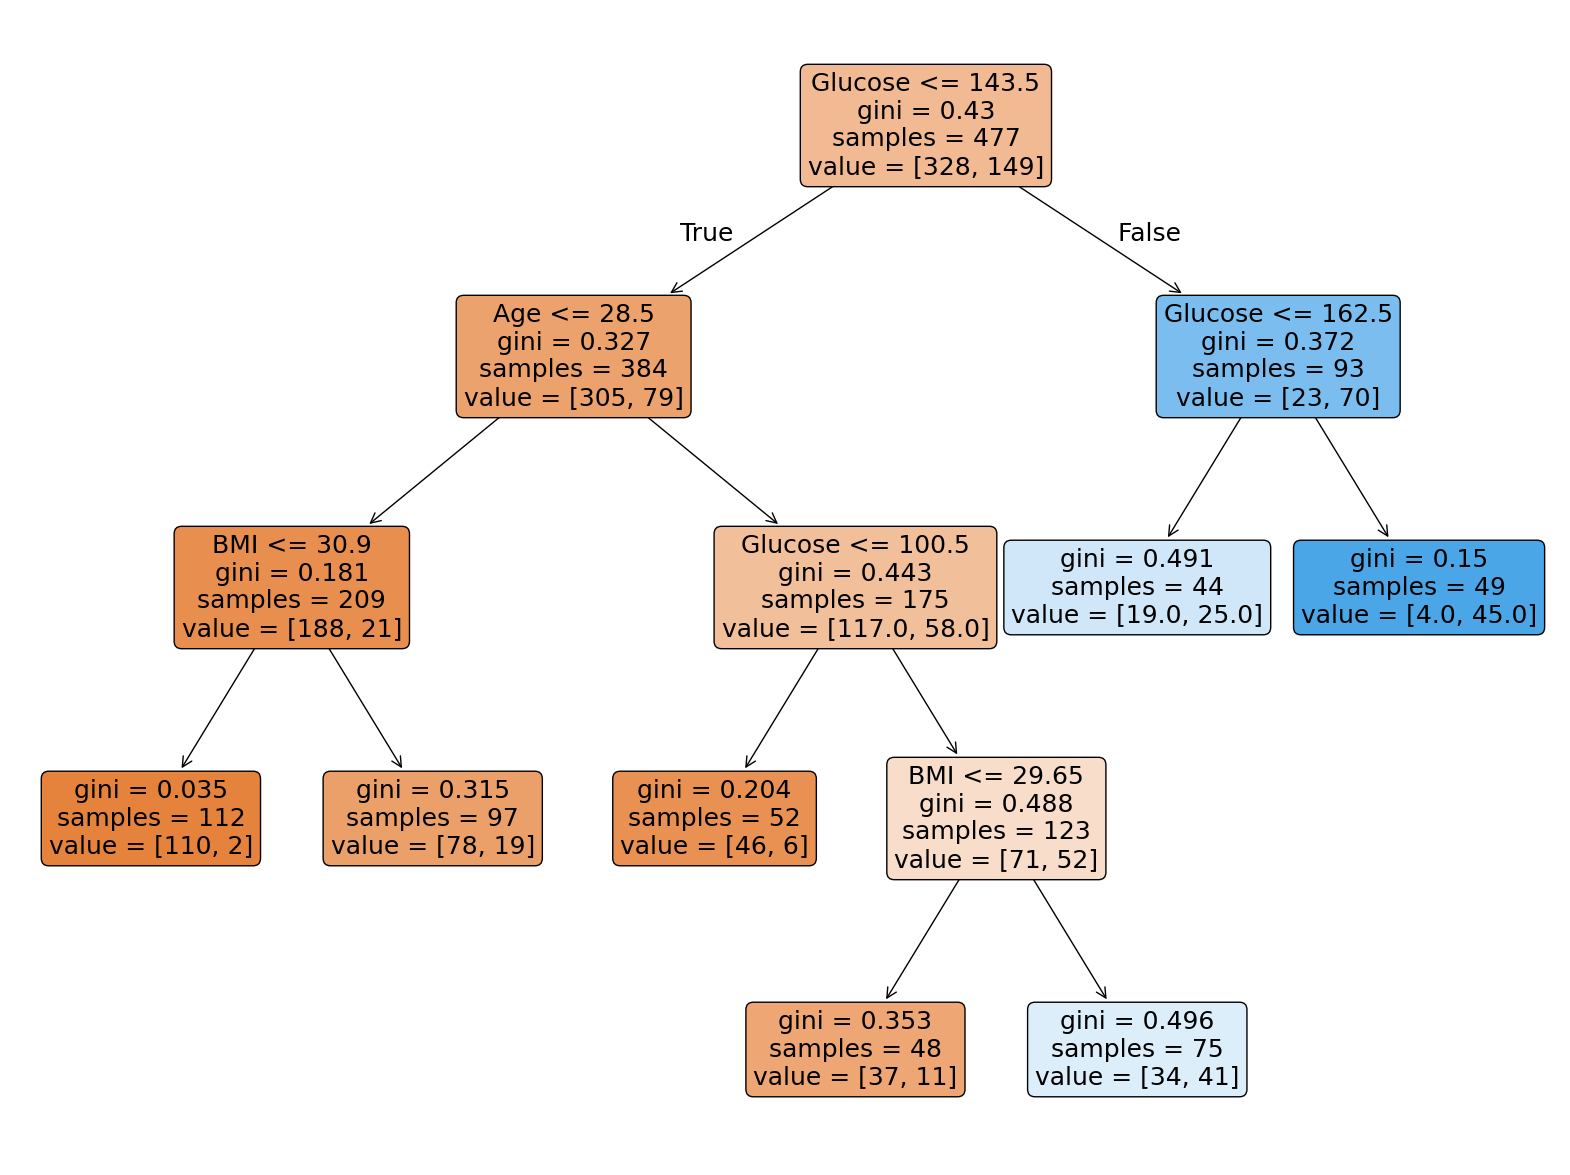

In [29]:
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns,rounded=True)
plt.show()

##### Random Forest

In [30]:
rf=RandomForestClassifier(class_weight ='balanced')
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 1000, 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(9), 'max_features': 'log2', 'criterion': 'entropy'}
0.7880762411347517


In [31]:
nrf=nrf.best_estimator_
predt4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [32]:
cr.append(classification_report(y_te,pred4))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4))
p.append(precision_score(y_te,pred4))
r_t.append(recall_score(y_t,predt4))
r.append(recall_score(y_te,pred4))
f1_t.append(f1_score(y_t,predt4))
f1.append(f1_score(y_te,pred4))

##### AdaBoost

In [33]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01)}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 1000, 'learning_rate': np.float64(0.77)}
0.7755762411347518


In [34]:
nada=nada.best_estimator_
predt5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [35]:
cr.append(classification_report(y_te,pred5))
cm_t.append(confusion_matrix(y_t,predt5))
cm.append(confusion_matrix(y_te,pred5))
acc_t.append(accuracy_score(y_t,predt5))
acc.append(accuracy_score(y_te,pred5))
p_t.append(precision_score(y_t,predt5))
p.append(precision_score(y_te,pred5))
r_t.append(recall_score(y_t,predt5))
r.append(recall_score(y_te,pred5))
f1_t.append(f1_score(y_t,predt5))
f1.append(f1_score(y_te,pred5))

##### Gradient Boost

In [36]:
gb=GradientBoostingClassifier()
params={'n_estimators': [2000], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.8, 'n_estimators': 2000, 'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(43), 'max_features': 'sqrt', 'learning_rate': np.float64(0.060000000000000005)}
0.7505762411347517


In [37]:
ngb=ngb.best_estimator_
predt6=nada.predict(x_t)
pred6=nada.predict(x_te)

In [38]:
cr.append(classification_report(y_te,pred6))
cm_t.append(confusion_matrix(y_t,predt6))
cm.append(confusion_matrix(y_te,pred6))
acc_t.append(accuracy_score(y_t,predt6))
acc.append(accuracy_score(y_te,pred6))
p_t.append(precision_score(y_t,predt6))
p.append(precision_score(y_te,pred6))
r_t.append(recall_score(y_t,predt6))
r.append(recall_score(y_te,pred6))
f1_t.append(f1_score(y_t,predt6))
f1.append(f1_score(y_te,pred6))

#### Metricas de evaluacion de modelos

In [39]:
models=['Logistic Regression','KNN','Decision Tree','Random Forest','Adaboost','Gradient Boost']
for model, report in zip(models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       111
           1       0.60      0.52      0.56        48

    accuracy                           0.75       159
   macro avg       0.70      0.68      0.69       159
weighted avg       0.74      0.75      0.74       159


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       111
           1       0.55      0.33      0.42        48

    accuracy                           0.72       159
   macro avg       0.65      0.61      0.61       159
weighted avg       0.69      0.72      0.69       159


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       111
           1       0.55      0.67      0.60        48

    accuracy                           0.74       159
   macr

In [40]:
# Training Metrics
m_t=pd.DataFrame({'Classification Algorithms':models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t.sort_values(by=['Training Accuracy','Training Precision','Training Recall','Training F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Random Forest,0.865828,0.737430,0.885906,0.804878
1,Adaboost,0.836478,0.779528,0.664430,0.717391
2,Gradient Boost,0.836478,0.779528,0.664430,0.717391
3,Logistic Regression,0.805031,0.759259,0.550336,0.638132
4,Decision Tree,0.800839,0.660714,0.744966,0.700315
5,KNN,0.794549,0.822785,0.436242,0.570175


In [41]:
# Testing Metrics
m_te=pd.DataFrame({'Classification Algorithms':models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te.sort_values(by=['Testing Accuracy','Testing Precision','Testing Recall','Testing F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Adaboost,0.773585,0.625000,0.625000,0.625000
1,Gradient Boost,0.773585,0.625000,0.625000,0.625000
2,Logistic Regression,0.748428,0.595238,0.520833,0.555556
3,Random Forest,0.742138,0.557377,0.708333,0.623853
4,Decision Tree,0.735849,0.551724,0.666667,0.603774
5,KNN,0.716981,0.551724,0.333333,0.415584


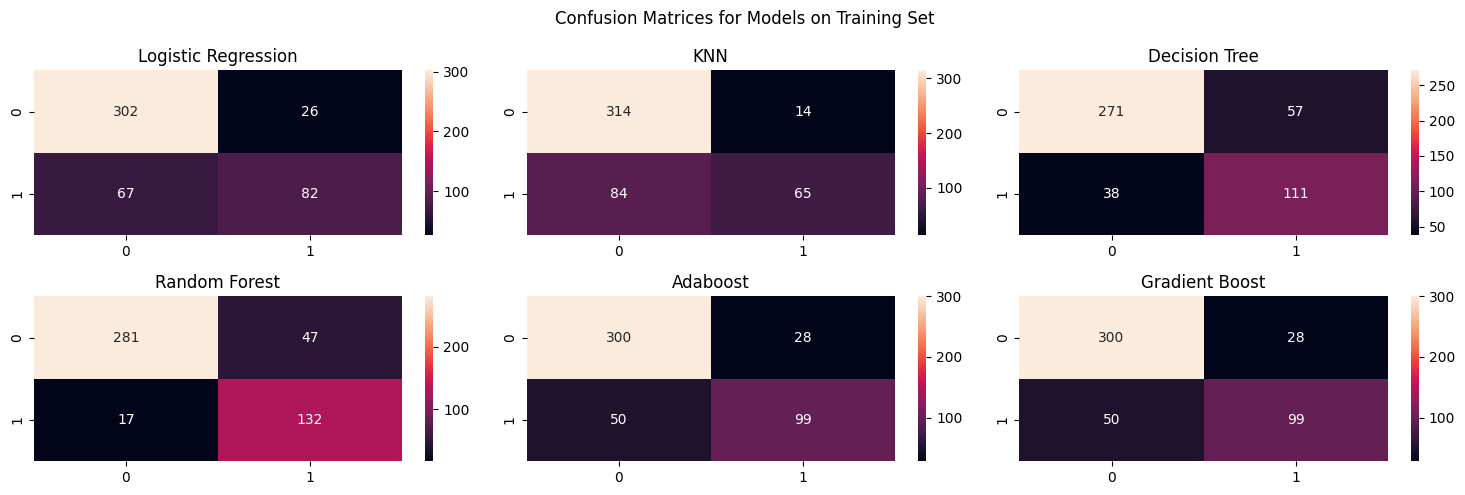

In [42]:
# Confusion Matrices for Training Set
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

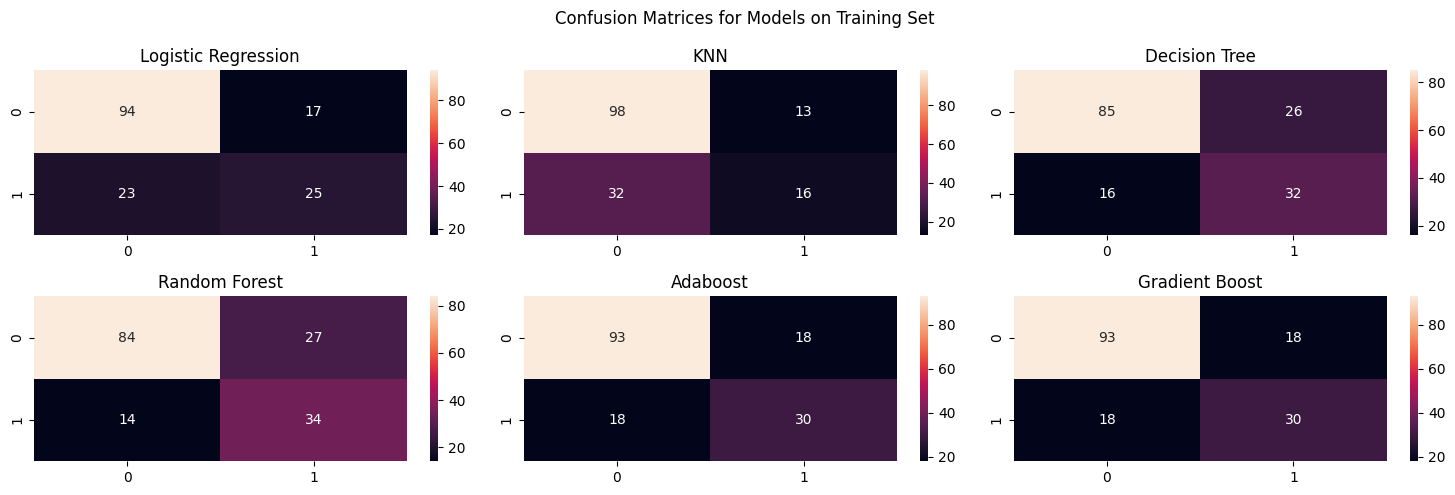

In [43]:
# Confusion Matrices for Testing Set
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

## Conclusión

* **Random Forest:** La alta precisión en entrenamiento y el recall indican que captura eficazmente la clase 1. Sin embargo, su rendimiento en pruebas disminuye, lo que sugiere un posible sobreajuste.
* **Adaboost y Gradient Boost:** Ambos modelos muestran métricas consistentes en entrenamiento, pero experimentan caídas de rendimiento en las pruebas, centrándose en minimizar falsos positivos.
* **Regresión Logística:** Un modelo base confiable con un rendimiento moderado en pruebas, aunque puede subrepresentar la clase 1.
* **Árbol de Decisión:** Eficaz para identificar la clase 1, pero sacrifica precisión, lo que lo hace útil en escenarios donde se prioriza la identificación de la clase positiva.
* **KNN:** El rendimiento general más bajo, lo que indica menor efectividad en este conjunto de datos desequilibrado.

Los modelos resaltan la importancia de equilibrar la precisión y el recall en conjuntos de datos desequilibrados. Adaboost y Gradient Boost ofrecen el mejor equilibrio, mientras que Random Forest y el Árbol de Decisión destacan en la captura de la clase 1 pero necesitan ajustes para mejorar la generalización.

## Entrega
Se debe entregar un archivo .ipynb comentado que incluya:

* Proceso completo de limpieza y preprocesamiento de datos.
* Visualizaciones y estadísticas descriptivas.
* Implementación y evaluación de los modelos de clasificación.
* Análisis comparativo del rendimiento de los modelos.
* El archivo debe subirse a GitHub con un tag de liberación (release tag).

## Consideraciones Éticas:
* **Transparencia y Reproducibilidad**: Todos los pasos del análisis son claros y reproducibles. 
* **Imparcialidad y Sesgo**: Revisar si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

## Consideraciones Tecnológicas:
* **Herramientas Utilizadas**: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
* **Escalabilidad**: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
* **Optimización de Modelos**: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.